In [6]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/placement.csv')
df.head()

Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0

In [7]:
df.shape

(100, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [9]:
df = df.iloc[:,1:]

In [10]:
df.head()

cgpa     iq  placement
0   6.8  123.0          1
1   5.9  106.0          0
2   5.3  121.0          0
3   7.4  132.0          1
4   5.8  142.0          0

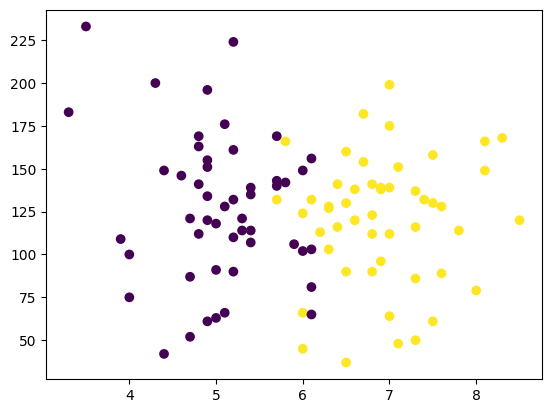

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

In [14]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [15]:
X

cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]

In [16]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)
X_train

cgpa     iq
52   7.0  175.0
8    6.1  156.0
12   5.4  139.0
6    5.7  143.0
80   4.9  196.0
..   ...    ...
76   4.9  155.0
34   4.8  163.0
30   7.6  128.0
94   4.7   52.0
64   7.0   64.0

[90 rows x 2 columns]

In [18]:
Y_train

52    1
8     0
12    0
6     0
80    0
     ..
76    0
34    0
30    1
94    0
64    1
Name: placement, Length: 90, dtype: int64

In [19]:
X_test

cgpa     iq
10   6.0   45.0
26   7.0  199.0
65   8.1  166.0
85   5.8  166.0
98   6.3  103.0
19   5.2  132.0
50   3.5  233.0
40   4.9  134.0
97   6.7  182.0
60   6.9  139.0

In [20]:
Y_test

10    1
26    1
65    1
85    1
98    1
19    0
50    0
40    0
97    1
60    1
Name: placement, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
X_train=scaler.fit_transform(X_train)

In [23]:
X_train

array([[ 0.89926476,  1.45530489],
       [ 0.10145046,  0.94649864],
       [-0.51907177,  0.49125094],
       [-0.25313367,  0.59836805],
       [-0.96230194,  2.01766969],
       [-0.87365591, -0.07111386],
       [-0.69636384,  2.76748942],
       [ 1.60843303, -0.17823096],
       [ 0.98791079, -1.94566319],
       [ 0.10145046, -0.472803  ],
       [ 1.16520286,  0.43769239],
       [-0.78500987,  1.48208416],
       [ 1.34249493,  1.00005719],
       [ 0.72197269,  0.06278253],
       [ 0.45603459,  0.25023746],
       [ 0.81061873,  0.46447167],
       [ 0.63332666,  0.89294009],
       [-1.40553211, -2.10633885],
       [-1.05094797,  0.5448095 ],
       [ 0.36738856, -0.12467241],
       [-1.05094797, -0.23178951],
       [ 1.43114096, -0.84771286],
       [ 0.81061873, -0.66025793],
       [-0.25313367,  1.29462923],
       [-0.51907177,  0.38413384],
       [ 0.01280443,  0.0895618 ],
       [-0.25313367,  0.30379601],
       [ 0.01280443, -1.46363622],
       [ 0.10145046,

In [24]:
X_test=scaler.transform(X_test)

In [25]:
X_test

array([[ 0.01280443, -2.02600102],
       [ 0.89926476,  2.09800752],
       [ 1.87437113,  1.2142914 ],
       [-0.16448764,  1.2142914 ],
       [ 0.27874253, -0.472803  ],
       [-0.69636384,  0.30379601],
       [-2.20334641,  3.00850291],
       [-0.96230194,  0.35735456],
       [ 0.63332666,  1.64275982],
       [ 0.81061873,  0.49125094]])

In [26]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()
clf.fit(X_train,Y_train)

LogisticRegression()

In [27]:
y_pred=clf.predict(X_test)

In [28]:
Y_test

10    1
26    1
65    1
85    1
98    1
19    0
50    0
40    0
97    1
60    1
Name: placement, dtype: int64

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8

<Axes: >

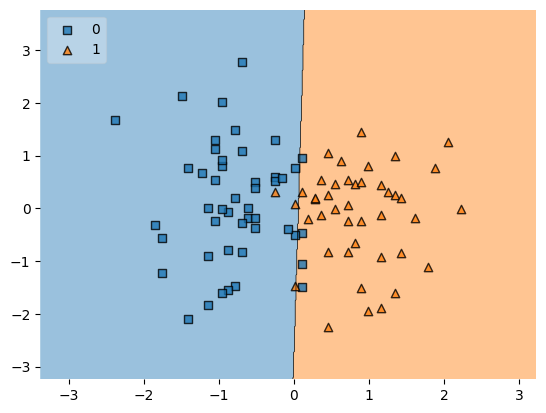

In [31]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)